# Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
px_template = "simple_white"

# importing Data

In [3]:
df = pd.read_csv('../diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Data Preprocessing

## 1. null values

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2. Zeros

In [6]:
cols = ["Glucose","BMI","Insulin","BloodPressure"]

In [7]:
for i in cols : 
    df[i].replace({0:df[i].median()}, inplace = True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 3. Outliers

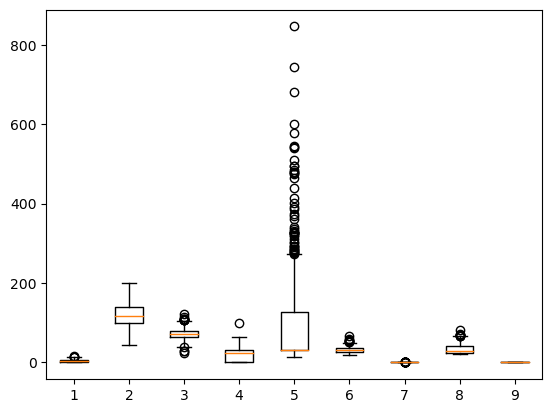

In [9]:
plt.boxplot(df)
plt.show()

# IQR

In [10]:
features = ["BMI","Glucose","SkinThickness","Age","BloodPressure","Insulin","Pregnancies","DiabetesPedigreeFunction"]
for i in features : 
    threshold = np.quantile(df[i], [0.25,0.75])
    
    iqr = threshold[1] - threshold[0]
    upper_b = threshold[1] + 1.5 * iqr
    lower_b = threshold[0] - 1.5 * iqr
    
    df[i]  = np.where(df[i] > upper_b, upper_b, (np.where(df[i] < lower_b ,lower_b, df[i])))

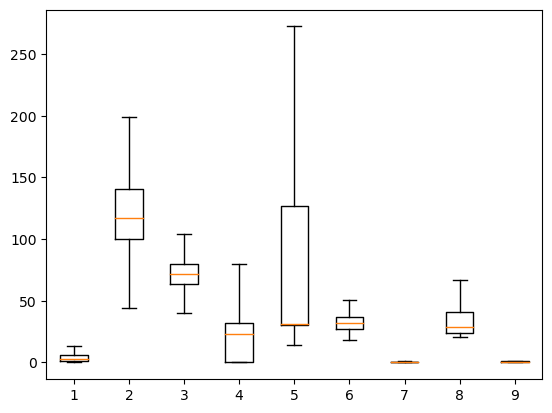

In [11]:
plt.boxplot(df)
plt.show()

# Modeling PHASE

In [12]:
x = df[df.columns.drop('Outcome')]
y = df['Outcome']

### Correlation Hitmap

Text(0.5, 1.0, 'Correlation between Features')

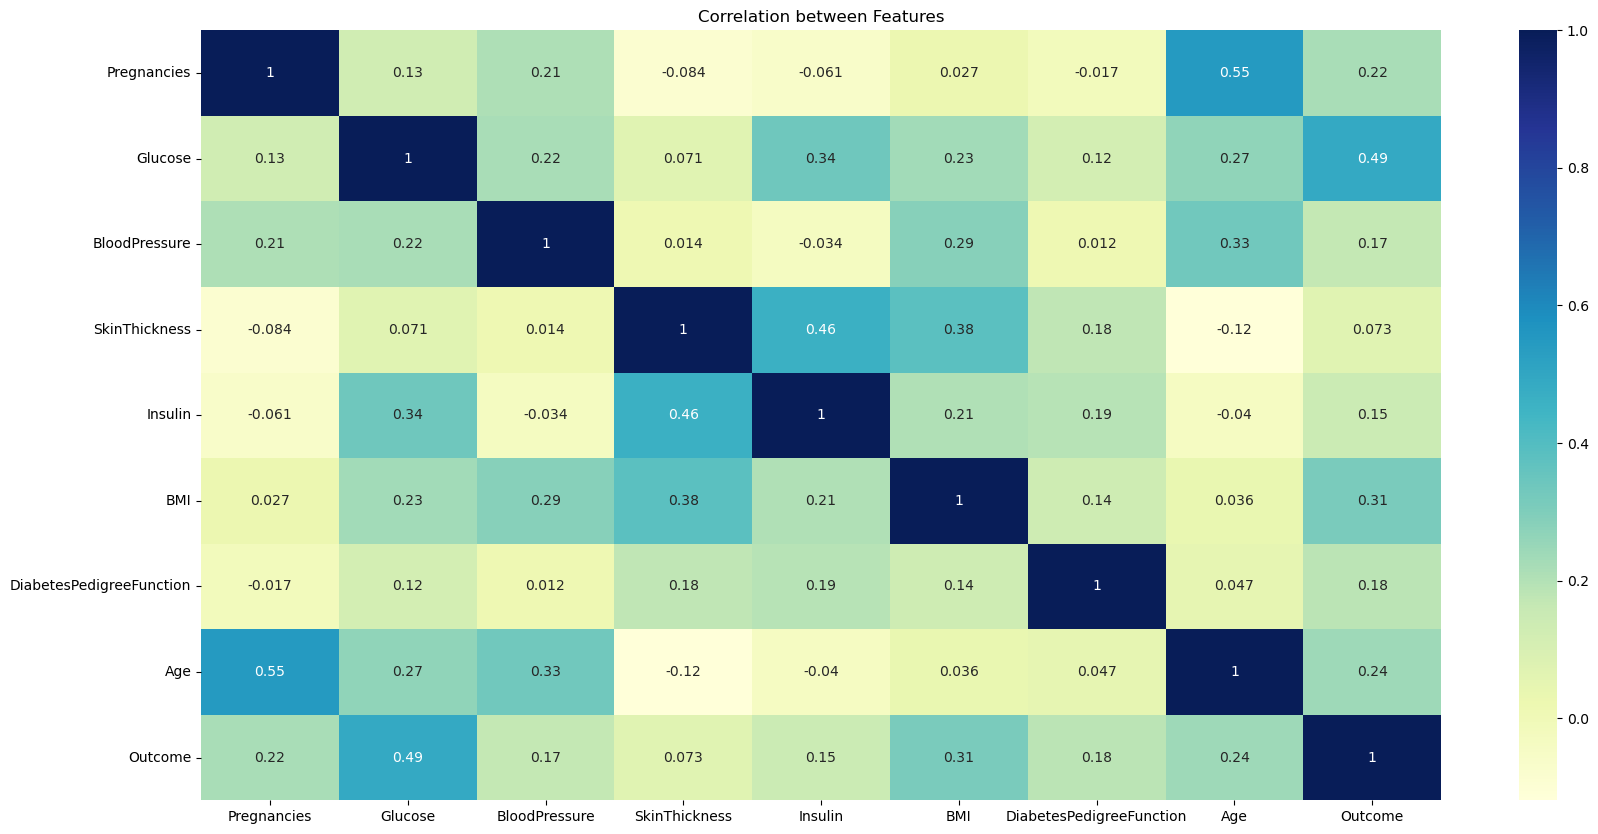

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlGnBu' )

plt.title("Correlation between Features")

# Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scale = MinMaxScaler()
x_scaled = scale.fit_transform(x)
x = x_scaled

# Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.02, random_state = 123)

# Balancing

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [19]:
ros = RandomOverSampler(random_state = 0)
x_new, y_new = ros.fit_resample(x_train, y_train)
x = x_new; y = y_new

## 1. LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)

LogisticRegression()

# Validation

In [22]:
from sklearn.metrics import classification_report , accuracy_score , f1_score,roc_curve,roc_auc_score, precision_score, recall_score

In [23]:
def validate(y_pred, y_test) : 
    res = {
        "accuracy" : accuracy_score(y_test, y_pred),
        "recall" : recall_score(y_test, y_pred),
        "precision" : precision_score(y_test, y_pred),
        "f1" : f1_score(y_test, y_pred)
    }
    
    return res

In [24]:
y_pred = log_clf.predict(x_test)

In [25]:
validate(y_pred, y_test)

{'accuracy': 0.875,
 'recall': 0.8571428571428571,
 'precision': 0.8571428571428571,
 'f1': 0.8571428571428571}

In [27]:
y_pred_train = log_clf.predict(x_train)

In [28]:
validate(y_pred_train, y_train)

{'accuracy': 0.776595744680851,
 'recall': 0.5478927203065134,
 'precision': 0.7409326424870466,
 'f1': 0.6299559471365638}

In [30]:
clsl = classification_report(y_test,y_pred)
print(clsl)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.86      0.86      0.86         7

    accuracy                           0.88        16
   macro avg       0.87      0.87      0.87        16
weighted avg       0.88      0.88      0.88        16



## cross-val

In [26]:
from sklearn.model_selection import cross_val_score